Attempting Simple Linear Regression Model using earnings 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from fitter import Fitter
from scipy.stats import skewnorm

In [74]:
df = pd.read_csv(r"Data\\india_data\\nifty50_data.csv")
df["Date"] = pd.to_datetime(df["Date"], dayfirst=True)
df.sort_values("Date", inplace=True)
df.head(5)

,Index Name,Date,PE,PB,Div Yield,Close,Earnings
6513,NIFTY 50,1999-01-01,11.62,2.07,1.83,890.80,76.66
6512,NIFTY 50,1999-01-04,11.72,2.08,1.81,897.80,76.60
6511,NIFTY 50,1999-01-05,11.84,2.11,1.79,907.20,76.62
6510,NIFTY 50,1999-01-06,12.11,2.16,1.75,928.25,76.65
6509,NIFTY 50,1999-01-07,12.46,2.22,1.71,954.70,76.62


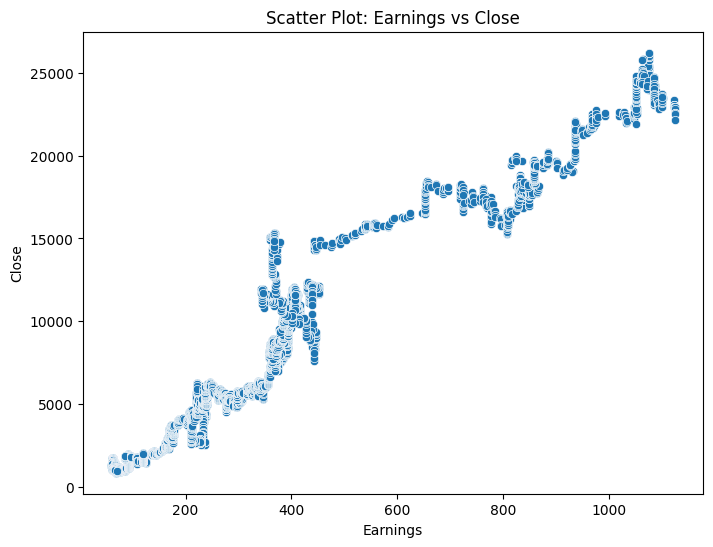

In [75]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Earnings', y='Close', data=df)
plt.title('Scatter Plot: Earnings vs Close')
plt.show()

I think good enough to try simple linear regression

Index = a + b*(Earnings)

In [76]:
df = df.dropna(subset=['Earnings', 'Close'])

In [77]:
X = df[['Earnings']]  
Y = df['Close'] 
model = LinearRegression()
model.fit(X,Y)
a = model.intercept_
b = model.coef_[0]
print(f'a = {a}')
print(f'b = {b}')

a = -343.73116546017627
b = 23.296543524524147


So, Current Regression Price = -343.73 + 23.3*Current Earnings

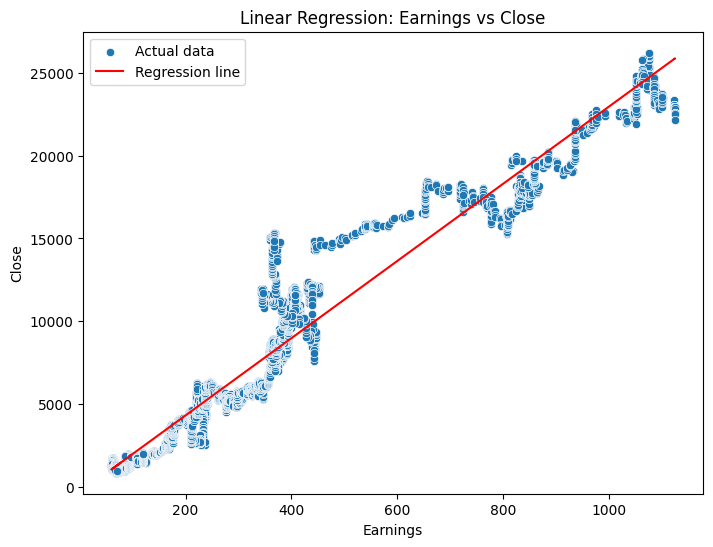

In [78]:
y_pred = model.predict(X)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Earnings', y='Close', data=df, label='Actual data')
plt.plot(df['Earnings'], y_pred, color='red', label='Regression line')
plt.xlabel('Earnings')
plt.ylabel('Close')
plt.title('Linear Regression: Earnings vs Close')
plt.legend()
plt.show()

In [79]:
y_pred = model.predict(X)

mse = mean_squared_error(Y, y_pred)
print(f'MSE = {mse}')

r2 = r2_score(Y, y_pred)
print(f'R-squared = {r2}')

MSE = 1950570.046719402
R-squared = 0.9475948178888653


For each of the historical earnings, Lets find out what the regression price is and look at how the regression has deviated from actual and plot the % deviation distribution

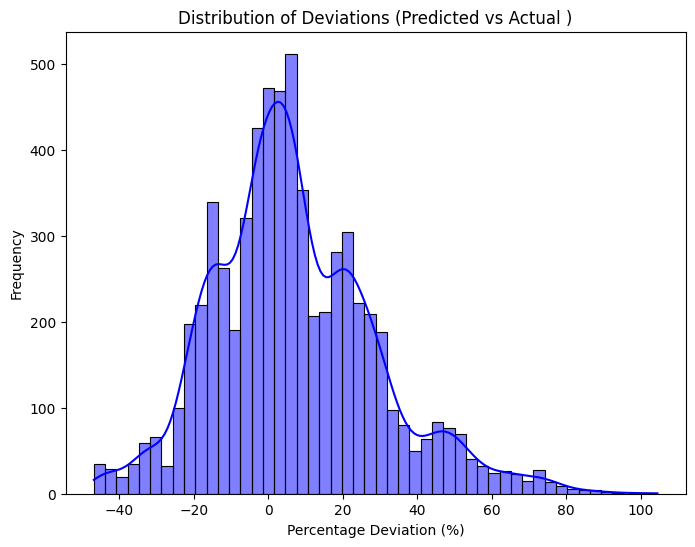

In [80]:
a = -343.73116546017627
b = 23.296543524524147
df['Predicted_Close'] = a + b * df['Earnings']
df['Percentage_Deviation'] = ((df['Predicted_Close'] - df['Close']) / df['Close']) * 100
plt.figure(figsize=(8, 6))
sns.histplot(df['Percentage_Deviation'], bins=50, kde=True, color='blue')
plt.xlabel('Percentage Deviation (%)')
plt.ylabel('Frequency')
plt.title('Distribution of Deviations (Predicted vs Actual )')
plt.show()

Similar to the deviation distribution made with median PE

In [81]:
df.head(5)

,Index Name,Date,PE,PB,Div Yield,Close,Earnings,Predicted_Close,Percentage_Deviation
6513,NIFTY 50,1999-01-01,11.62,2.07,1.83,890.80,76.66,1442.181861,61.897380
6512,NIFTY 50,1999-01-04,11.72,2.08,1.81,897.80,76.60,1440.784069,60.479402
6511,NIFTY 50,1999-01-05,11.84,2.11,1.79,907.20,76.62,1441.249999,58.867945
6510,NIFTY 50,1999-01-06,12.11,2.16,1.75,928.25,76.65,1441.948896,55.340576
6509,NIFTY 50,1999-01-07,12.46,2.22,1.71,954.70,76.62,1441.249999,50.963653


In [82]:
df.tail(5)

,Index Name,Date,PE,PB,Div Yield,Close,Earnings,Predicted_Close,Percentage_Deviation
4,NIFTY 50,2025-02-21,20.26,3.39,1.41,22795.90,1125.17,25868.840712,13.480234
3,NIFTY 50,2025-02-24,20.05,3.36,1.42,22553.35,1124.86,25861.618784,14.668636
2,NIFTY 50,2025-02-25,20.04,3.36,1.42,22547.55,1125.13,25867.908850,14.726029
1,NIFTY 50,2025-02-27,20.04,3.36,1.42,22545.05,1125.00,25864.880300,14.725318
0,NIFTY 50,2025-02-28,19.67,3.29,1.45,22124.70,1124.79,25859.988025,16.882887


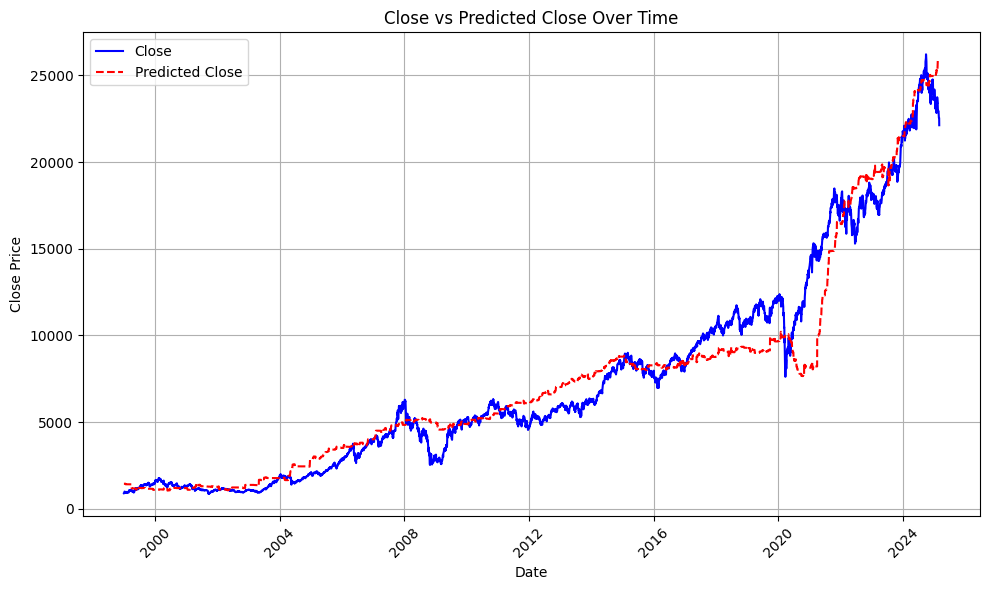

In [83]:
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Close'], label='Close', linestyle='-', color='blue')
plt.plot(df['Date'], df['Predicted_Close'], label='Predicted Close', linestyle='--', color='red')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Close vs Predicted Close Over Time')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45) 
plt.tight_layout() 
plt.show()

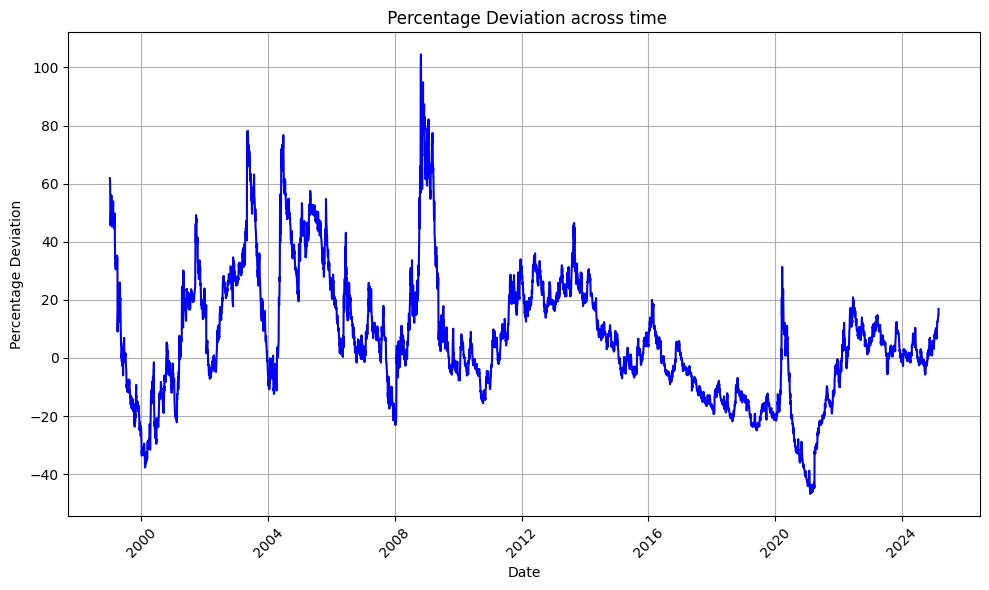

In [84]:
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Percentage_Deviation'], linestyle='-', color='b')
plt.xlabel('Date')
plt.ylabel('Percentage Deviation')
plt.title(' Percentage Deviation across time')
plt.grid(True)
plt.xticks(rotation=45)  
plt.tight_layout()  
plt.show()

### Say in 2016, I had run the same regression and come up with an equation relating Price and earnings, how would it look today vs actual data that we have now? 

In [85]:
df_2016 = df[df["Date"]<=pd.to_datetime("2016-01-01")]

In [86]:
print(df_2016.shape, df.shape)

(4243, 9) (6514, 9)


In [87]:
df_2016 = df_2016.dropna(subset=['Earnings', 'Close'])

In [88]:
X = df_2016[['Earnings']]  
Y = df_2016['Close'] 
model = LinearRegression()
model.fit(X,Y)
a = model.intercept_
b = model.coef_[0]
print(f'a = {a}')
print(f'b = {b}')

a = -352.2382383247009
b = 21.059740005705127


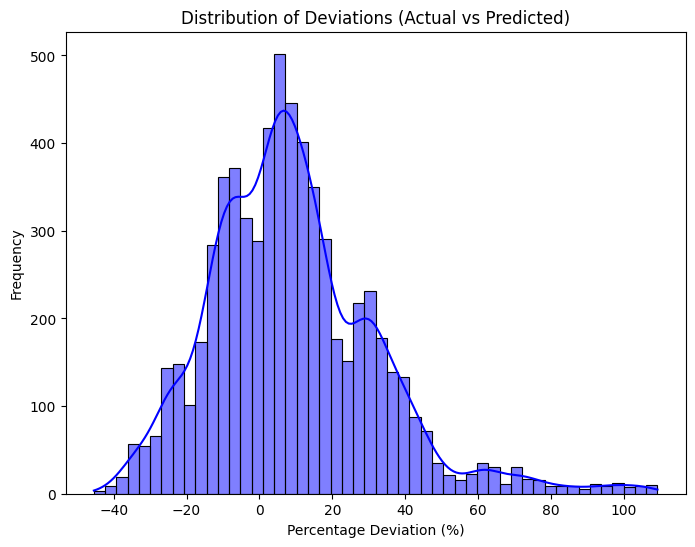

In [89]:
a = -352.2382383247009
b = 21.059740005705127
df['Predicted_Close'] = a + b * df['Earnings']
df['Percentage_Deviation'] = ((df['Close'] - df['Predicted_Close']) / df['Predicted_Close']) * 100
plt.figure(figsize=(8, 6))
sns.histplot(df['Percentage_Deviation'], bins=50, kde=True, color='blue')
plt.xlabel('Percentage Deviation (%)')
plt.ylabel('Frequency')
plt.title('Distribution of Deviations (Actual vs Predicted)')
plt.show()

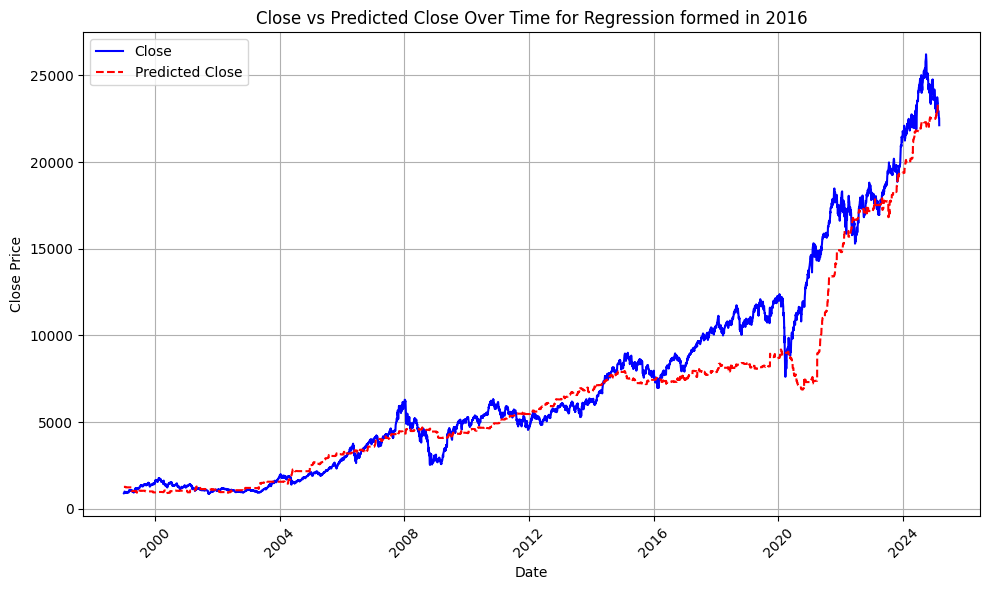

In [90]:
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Close'], label='Close', linestyle='-', color='blue')
plt.plot(df['Date'], df['Predicted_Close'], label='Predicted Close', linestyle='--', color='red')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Close vs Predicted Close Over Time for Regression formed in 2016')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45) 
plt.tight_layout() 
plt.show()

### Not bad

Back to latest regression

In [91]:
a = -343.73116546017627
b = 23.296543524524147
df['Predicted_Close'] = a + b * df['Earnings']
df['Percentage_Deviation'] = ((df['Predicted_Close'] - df['Close']) / df['Close']) * 100

In [92]:
print(np.min(df["Percentage_Deviation"]),np.max(df["Percentage_Deviation"]))

-46.80602515899877 104.51655560419564


Instead of trying various distributions and fitting, we can use the Fitter package which automatically fits and returns the parameters - the list of distributions to try can be added in the array. Timeout is for max time for fitting each distribution. While list of distributions is not exhaustive its a reasonably good list to use

Check : https://fitter.readthedocs.io/en/latest/


In [125]:
data = df["Percentage_Deviation"].dropna().values

f = Fitter(
    data,
    distributions=['norm', 'lognorm', 'gamma', 'beta', 't', 'laplace', 'skewnorm', 'expon', 'uniform'],
    timeout=30
)
f.fit()

best = f.get_best()
best_name = list(best.keys())[0]
best_params = best[best_name]

print(f"Best fit: {best_name} with params: {best_params}")

Best fit: skewnorm with params: {'a': 2.1278878802080445, 'loc': -15.726487692280248, 'scale': 31.7103497435538}


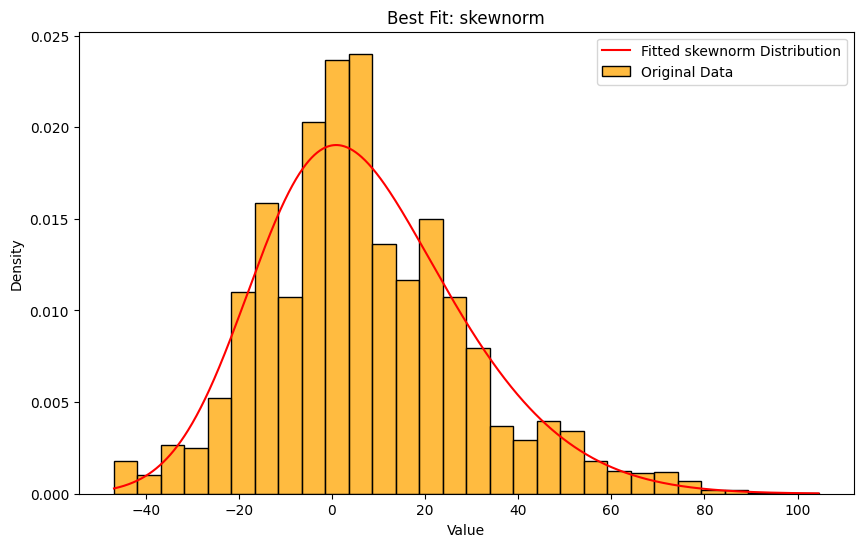

In [94]:
if isinstance(best_params, dict):
    shape_keys = [k for k in best_params if k not in ("loc", "scale")]
    shape_params = [float(best_params[k]) for k in shape_keys]
    loc = float(best_params.get("loc", 0))
    scale = float(best_params.get("scale", 1))
else:
    params = [float(p) for p in best_params]
    *shape_params, loc, scale = params

dist = getattr(stats, best_name)

plt.figure(figsize=(10, 6))
sns.histplot(data, bins=30, stat="density", color="orange", label="Original Data")

x = np.linspace(min(data), max(data), 1000)
y = dist.pdf(x, *shape_params, loc=loc, scale=scale)

plt.plot(x, y, 'r-', label=f"Fitted {best_name} Distribution")
plt.xlabel("Value")
plt.ylabel("Density")
plt.title(f"Best Fit: {best_name}")
plt.legend()
plt.show()

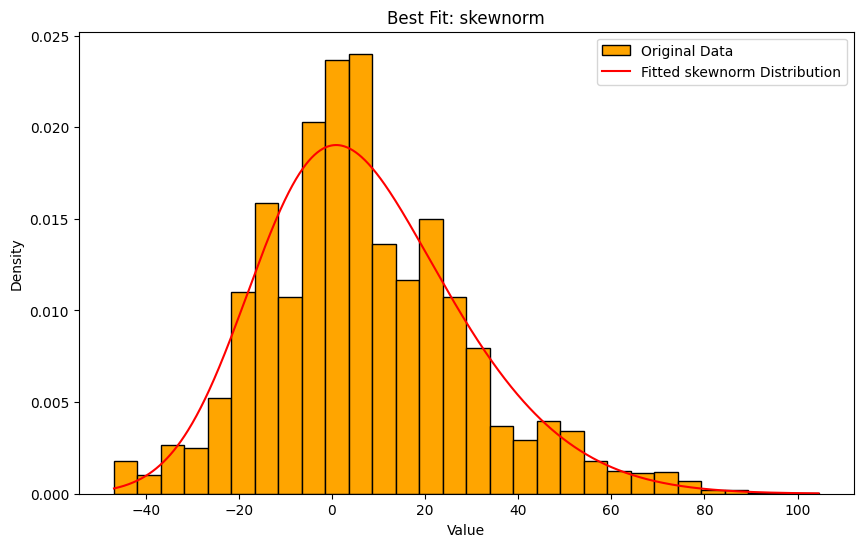

In [ ]:
if isinstance(best_params, dict):
    shape_keys = [k for k in best_params if k not in ("loc", "scale")]
    shape_params = [float(best_params[k]) for k in shape_keys]
    loc = float(best_params.get("loc", 0))
    scale = float(best_params.get("scale", 1))
else:
    params = [float(p) for p in best_params]
    *shape_params, loc, scale = params
dist = getattr(stats, best_name)
plt.figure(figsize=(10, 6))
plt.hist(data, bins=30, density=True, color="orange", edgecolor="black", label="Original Data")
x = np.linspace(min(data), max(data), 1000)
y = dist.pdf(x, *shape_params, loc=loc, scale=scale)
plt.plot(x, y, 'r-', label=f"Fitted {best_name} Distribution")
plt.xlabel("Value")
plt.ylabel("Density")
plt.title(f"Best Fit: {best_name}")
plt.legend()
plt.show()

We are doing pred - actual / actual ==> how much higher / lower forecast is compared to actual... so if the deviation is higher, ie a positive value like +14%, it means that the current index level is lower than predicted. So the LHS (the lower + negative side) here implies the probability of index rising and RHS is index falling (actual > predicted) 

In [126]:
a = best_params["a"]    
loc = best_params["loc"]  
scale = best_params["scale"] 
a1 = -343.73116546017627 # clashing with skewnorm's a so changed vars to a1 and b1
b1 = 23.296543524524147

crt_price = float(input("Enter Nifty 50's current price"))
crt_pe = float(input("Enter Nifty 50's current pe"))
crt_earn = crt_price / crt_pe
pred_price = a1 + b1*crt_earn
x = (pred_price - crt_price) / crt_price * 100
p_left = skewnorm.cdf(x, a, loc=loc, scale=scale)
p_right = (1 - p_left)*100
p_left = p_left*100

print(f"Prob increasing = {p_left:.2f} %")
print(f"Prob falling = {p_right:.2f} %") 

Prob increasing = 0.02 %
Prob falling = 99.98 %
